# Introduction
text texe

In [29]:
import pypyodbc as pyodbc
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import matplotlib.pyplot as plt


In [30]:
DRIVER_NAME = 'SQL Server'
SERVER_NAME = 'Zotac-B\SQLEXPRESS'
DATABASE_NAME = 'ShopInventoryDB'

connection_string = 'Driver={SQL Server};Server=' + SERVER_NAME + ';Database=' + DATABASE_NAME + ';'


In [31]:
connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": connection_string})
engine = create_engine(connection_url)

In [32]:
query = 'SELECT * FROM Orders as o JOIN OrderItems as oi on o.order_id = oi.order_id; '

df = pd.read_sql_query(query, engine)
print(df)


     order_id  order_date  customer_id  total_amount  order_item_id  order_id  \
0           1  2023-07-01           20             2              1         1   
1           1  2023-07-01           20             2              2         1   
2           2  2023-07-01           41             2              3         2   
3           2  2023-07-01           41             2              4         2   
4           3  2023-07-01           62             1              5         3   
..        ...         ...          ...           ...            ...       ...   
149        93  2023-07-30           85             2            150        93   
150        93  2023-07-30           85             2            151        93   
151        94  2023-07-30           61             2            152        94   
152        94  2023-07-30           61             2            153        94   
153        95  2023-07-31           42             1            154        95   

     product_id  quantity_o

In [33]:
query = 'SELECT COUNT(DISTINCT(order_id)) as orders_amount FROM Orders'

df = pd.read_sql_query(query, engine)
print(df[['orders_amount']].to_string(index=False))
orders_amount = df['orders_amount'][0]

 orders_amount
            95


In [34]:
query = 'SELECT oi.order_id, SUM(oi.quantity_ordered) as items_in_order, SUM(oi.unit_price*oi.quantity_ordered) as total_price FROM Orders as o JOIN OrderItems as oi on o.order_id = oi.order_id GROUP BY oi.order_id'
df = pd.read_sql_query(query, engine)
mean = df['total_price'].mean().round(2)
print('Average price of all orders')
print(mean)

Average price of all orders
97.69


In [35]:
print('Median price of all orders')
print(df['total_price'].median())

Median price of all orders
79.98


In [27]:
print('Mode price of all orders')
print(df['total_price'].mode())

Mode price of all orders
0    179.98
Name: total_price, dtype: float64


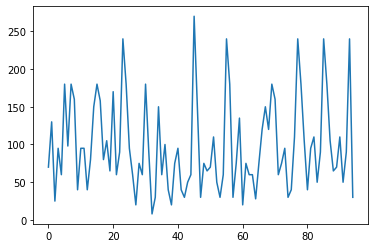

In [37]:
df['total_price'].plot()
plt.show()

In [38]:
query = 'SELECT COUNT(DISTINCT(order_id)) as orders_amount FROM Orders'
print(df)

    order_id  items_in_order  total_price
0          1               2        69.98
1          2               2       129.98
2          3               1        24.99
3          4               2        94.98
4          5               2        59.98
..       ...             ...          ...
90        91               2       109.98
91        92               1        49.99
92        93               2        89.98
93        94               2       239.98
94        95               1        29.99

[95 rows x 3 columns]


In [72]:
query = 'SELECT oi.product_id, p.quantity_in_stock as amount_in_stock, SUM(oi.quantity_ordered) as amount_ordered FROM OrderItems as oi LEFT JOIN Products as p on oi.product_id = p.product_id GROUP BY oi.product_id, p.quantity_in_stock'
df = pd.read_sql_query(query, engine)
print(df)

    product_id  amount_in_stock  amount_ordered
0           11                5              10
1           10                7              13
2            6                8               8
3           14                9               9
4            4               10              12
5           13               12               8
6            9               14               9
7            3               15               9
8            7               18              12
9            1               20               9
10          16               20              10
11           8               22               8
12           2               25              10
13          15               25               6
14           5               28               9
15          12               28              10
16          18               28               4
